### Método de rotaciones de Jacobi one sided

Se denota $A_k=[a_1^{(k)},a_2^{(k)},...,a_n^{(k)}$, con cada $a_i^{(k)}$ como la iésima columna de $A$.

Dados $A \in \mathbb{R}^{m \times n}$ y $tol>0$ definir $A_0 = A$, $Q_0 = I_n$.

Repetir el siguiente bloque para k=0,1,2...

1. Elegir un par de índices $(idx1,idx2)$ con alguna de las metodologías descritas en el bloque siguiente de comentarios.

2. Revisar si las columnas $a_i^{(k)}, a_j^{(k)}$ de $A^{(k)}$ son ortogonales (el chequeo se describe en los comentarios). 

3. Si son ortogonales se incrementa por uno la variable $num\text{_}columnas\text{_}ortogonales$. 

4. Si no fueron ortogonales las columnas del paso 2, actualizar las columnas $i,j$ de $A_k$. 

5. Si no fueron ortogonales las columnas del paso 2, actualizar a la matriz $V_k$.

hasta la convergencia. 

In [2]:
import numpy as np 
import pandas as pd
from PIL import Image 
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [3]:
# Función para revisar ortogonalidad
def ortogonalidad(A,i,j):
    tol = 1e-8
    numerador = np.abs(np.dot(A[:,i],A[:,j])) 
    denominador = np.linalg.norm(A[:,i]) * np.linalg.norm(A[:,j])
    ortogonal = numerador/denominador < tol
    return ortogonal 

In [4]:
def sign(x):
    """
    Helper function for computing sign of real number x.
    """
    if x >=0:
        return 1
    else:
        return -1

In [5]:
def seno_coseno(A, i, j):
    x = A[:,i]
    y = A[:,j]
    a = np.dot(x,x)
    b = np.dot(y,y)
    c = np.dot(x,y)
    tau = (b-a) / (2*c)
    t = sign(tau) / (np.abs(tau) + np.sqrt(1+tau**2))
    c = 1/np.sqrt(1+t**2)
    s = c*t
    return c,s

In [6]:
def actualizar_AV(A, V, i, j):
    tempA = A[:,i].copy()
    tempV = V[:,i].copy()

    c,s = seno_coseno(A, i, j)
    
    A[:,i] = c * tempA - s * A[:,j]
    A[:,j] = s * tempA + c * A[:,j]
    
    V[:,i] = c * tempV - s * V[:,j]
    V[:,j] = s * tempV + c * V[:,j]

    return A,V

In [7]:
def jacobi_one_sided(A_k,max_sweeps):
    sweeps = 0
    num_columnas_ortogonales = 0
    n = A_k.shape[1]
    V_k = np.eye(n)
    A = np.copy(A_k)
    
    while num_columnas_ortogonales != n*(n-1)/2 and sweeps < max_sweeps:
        num_columnas_ortogonales = 0
        for i in range(n):
            for j in range(i+1,n):
                if ortogonalidad(A,i,j)==False:
                    A,V_k=actualizar_AV(A,V_k,i,j)
                #    print(False)
                else: 
                    num_columnas_ortogonales += 1
                    A,V_k
                #    print(True)
                #print(A)
                #print(V_k,num_columnas_ortogonales)

        sweeps += 1
        #print(sweeps)
    return A,V_k

In [8]:
def normalizacion_A(matriz):
    n = matriz.shape[1]
    m = matriz.shape[0]
    U = np.zeros((m,n))

    for i in range(n):
        u = matriz[:,i]/np.linalg.norm(matriz[:,i])
        U[:,i] = u
        
    indexlist = np.argsort(np.linalg.norm(matriz,axis=0))[::-1]
    return U[:,indexlist]

In [9]:
matriz_A = np.array([[ 1, 2, 3, 4],
              [ 2,-2, 4, 5],
              [ 3, 5, 6, 7],
              [ 4, 5, 7, 9.0]])

In [10]:
A_final,V_final=jacobi_one_sided(matriz_A,10)

In [11]:
S_final = np.linalg.norm(A_final,axis=0)

In [12]:
U_final = normalizacion_A(A_final)
U_final

array([[ 0.291,  0.031, -0.933,  0.209],
       [ 0.301, -0.94 ,  0.027, -0.161],
       [ 0.579,  0.315,  0.023, -0.752],
       [ 0.699,  0.131,  0.358,  0.605]])

Comparando con funciones objetivo

In [13]:
U, S, V_T = np.linalg.svd(matriz_A,full_matrices=False)

In [14]:
S

array([18.675,  4.438,  0.66 ,  0.366])

In [15]:
S_final

array([ 0.66 ,  4.438, 18.675,  0.366])

In [16]:
U_final

array([[ 0.291,  0.031, -0.933,  0.209],
       [ 0.301, -0.94 ,  0.027, -0.161],
       [ 0.579,  0.315,  0.023, -0.752],
       [ 0.699,  0.131,  0.358,  0.605]])

In [17]:
U

array([[-0.291, -0.031, -0.933,  0.209],
       [-0.301,  0.94 ,  0.027, -0.161],
       [-0.579, -0.315,  0.023, -0.752],
       [-0.699, -0.131,  0.358,  0.605]])

In [21]:
V_final.T

array([[ 0.943, -0.022, -0.072, -0.325],
       [-0.086,  0.94 , -0.194, -0.269],
       [ 0.291,  0.341,  0.56 ,  0.697],
       [ 0.139,  0.013, -0.803,  0.58 ]])

In [19]:
V_T

array([[-0.291, -0.341, -0.56 , -0.697],
       [ 0.086, -0.94 ,  0.194,  0.269],
       [ 0.943, -0.022, -0.072, -0.325],
       [ 0.139,  0.013, -0.803,  0.58 ]])

In [60]:
# Cargamos imagen
img=plt.imread('kiara.png')

In [61]:
img.shape

(449, 449, 3)

In [62]:
img = img[:,:,0]

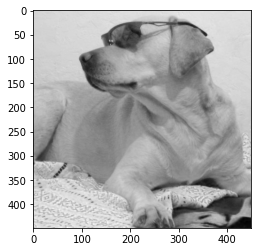

In [63]:
plt.imshow(img,cmap='gray')
plt.show()

In [64]:
A_final,V_final=jacobi_one_sided(img,3)

1
2
3


In [65]:
# Función que dibuja la imagen con las matrices
def svd_img(vec_len,A,V):
    vec_len = vec_len
    img_svd = 0
    
    for i in (range(vec_len)):
        img_svd += np.outer((A[:,i]),V.T[i,:])
    plt.imshow(img_svd,cmap='gray')
    plt.title('Jacobi: '+str(vec_len))
    return plt.show()

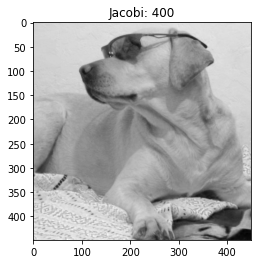

In [66]:
svd_img(400,A_final,V_final)